# ICC Champions Trophy Cricket Dataset (1998 - 2025)

The ICC Champions Trophy, is one of cricket's premier limited-overs tournaments, played a pivotal role in international cricket from its inception in 1998 until its last edition in 2025. Originally known as the ICC KnockOut, the tournament was designed to bring together the world's leading cricketing nations in a competitive, yet entertaining format. This data provides the relevant information of all ICC Champions Trophy matches played played between 1998 to 2025. This could be used to predict results of upcoming matches, draw meaningful insights from data such as which all factors majorly contribute to the success of any team.

# Hello Guys, How are you all!!

I am Avinash, today, we will get insights from the data.


In [1]:
# First, we need to install required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# 1. File paths and Data Loading, here we take 2 files one is matches data and other is players data.

matches_file_path = '/content/all_champions_trophy_matches_results.csv'
players_file_path = '/content/all_champions_trophy_players_list.csv'

In [5]:
# Load the datasets
matches_df = pd.read_csv(matches_file_path)
players_df = pd.read_csv(players_file_path)

# Set plot style for consistency
sns.set(style="whitegrid")

Missing values in Matches Data:
Team1                           0
Team2                           0
Toss                            0
Match days                      0
Winner                          0
Player of the Match             7
Margin                          0
Ground                          0
Match Date                      0
ODI Int Match                   0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total CTs participated    0
Team1 Total CTs won             0
Team2 Total CTs participated    0
Team2 Total CTs won             0
Team1 W/L ratio over Team2      0
dtype: int64

Missing values in Players Data:
Team           0
Year           0
Player Name    0
dtype: int64


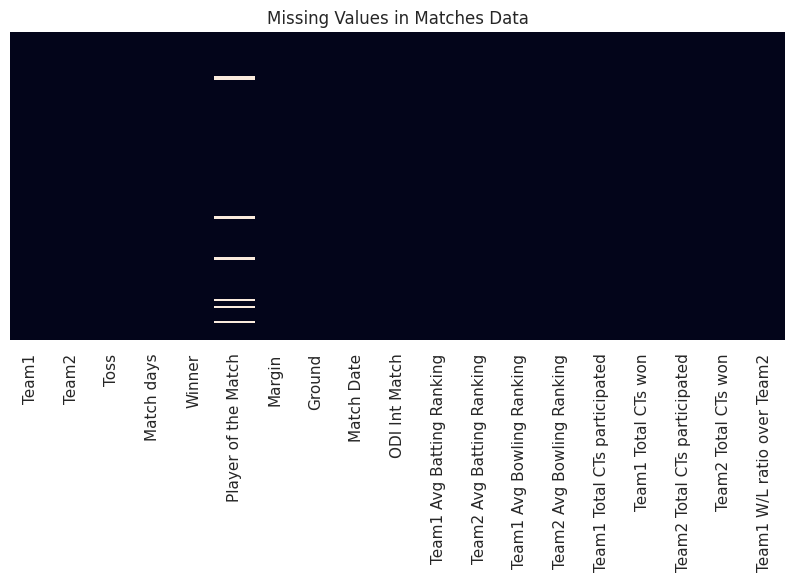

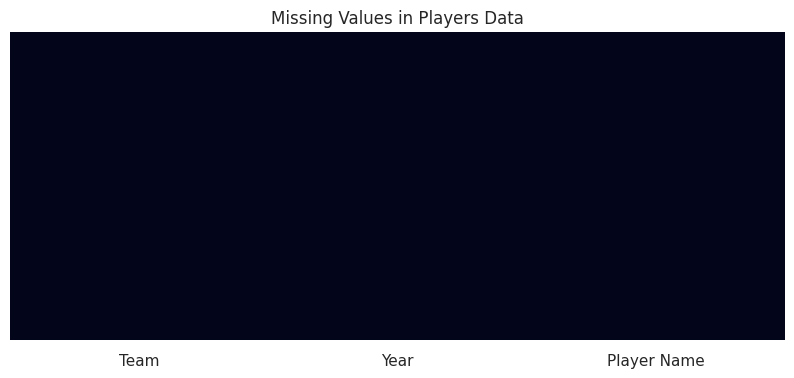

In [6]:
# 2. Data Quality & Missing Values

print("Missing values in Matches Data:")
print(matches_df.isnull().sum())
print("\nMissing values in Players Data:")
print(players_df.isnull().sum())

# Visualize missing data using heatmaps
plt.figure(figsize=(10, 4))
sns.heatmap(matches_df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in Matches Data")
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(players_df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in Players Data")
plt.show()

<ipython-input-8-61d4ae3106db>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-8-61d4ae3106db>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using


Missing values in Matches Data after filling:
Team1                           0
Team2                           0
Toss                            0
Match days                      0
Winner                          0
Player of the Match             0
Margin                          0
Ground                          0
Match Date                      0
ODI Int Match                   0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total CTs participated    0
Team1 Total CTs won             0
Team2 Total CTs participated    0
Team2 Total CTs won             0
Team1 W/L ratio over Team2      0
dtype: int64

Missing values in Players Data after filling:
Team           0
Year           0
Player Name    0
dtype: int64


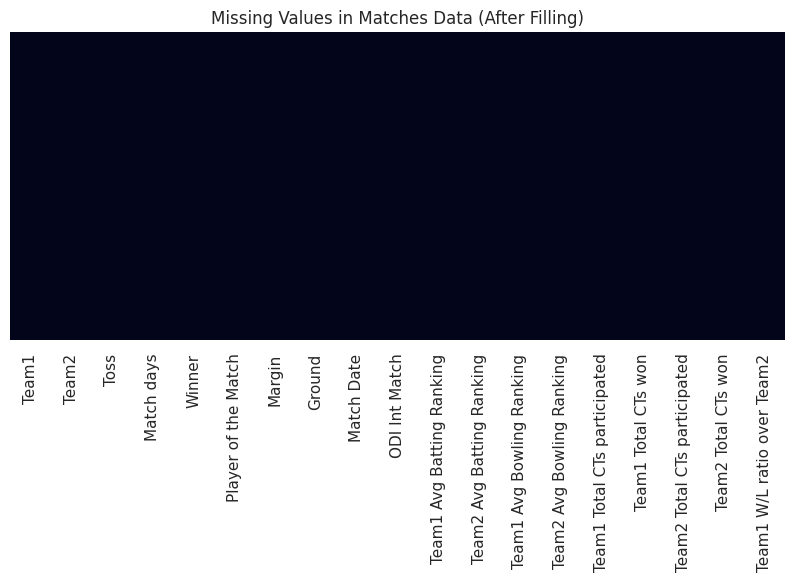

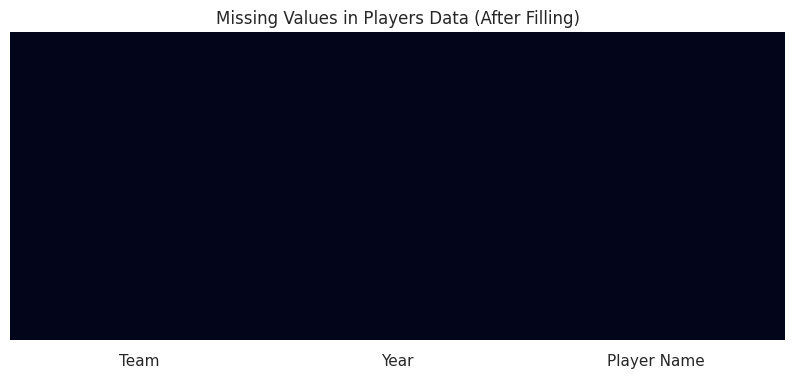

In [8]:
# Fill missing values using a simple strategy:

#    - Numeric columns: Fill with mean
#    - Non-numeric columns: Fill with mode (most frequent value)

def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # For numeric columns, fill with mean
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            # For non-numeric columns, fill with mode if possible
            if df[col].mode().empty:
                df[col].fillna("Unknown", inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

# Apply the filling function to both DataFrames
fill_missing_values(matches_df)
fill_missing_values(players_df)


# Verify that missing values have been filled

print("\nMissing values in Matches Data after filling:")
print(matches_df.isnull().sum())
print("\nMissing values in Players Data after filling:")
print(players_df.isnull().sum())


# Visualize missing data using a heatmap (should show no missing values now)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 4))
sns.heatmap(matches_df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in Matches Data (After Filling)")
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(players_df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in Players Data (After Filling)")
plt.show()

In [9]:
# 3. Dataset Overview and Summary Statistics.

print("Matches dataset shape:", matches_df.shape)
print("Players dataset shape:", players_df.shape)
print("\nSummary statistics for Matches Data:")
print(matches_df.describe())

Matches dataset shape: (127, 19)
Players dataset shape: (1155, 3)

Summary statistics for Matches Data:
       Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
count                 127.000000                 127.000000   
mean                   72.305984                  73.160472   
std                    11.005008                  11.170054   
min                    52.080000                  51.750000   
25%                    64.700000                  65.360000   
50%                    70.870000                  72.400000   
75%                    79.325000                  78.635000   
max                   101.000000                 101.000000   

       Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
count                 127.000000                 127.000000   
mean                   76.502598                  76.785748   
std                     9.081886                   9.405554   
min                    58.170000                  58.250000   
25%          

In [10]:
# 4. Matches Count & Time Range

if 'Date' in matches_df.columns:
    matches_df['Date'] = pd.to_datetime(matches_df['Date'], errors='coerce')
    print("\nDate range in Matches Data:", matches_df['Date'].min(), "to", matches_df['Date'].max())


Wins per Team:
Winner
India           22
New Zealand     15
South Africa    14
Sri Lanka       14
England         14
West Indies     13
Australia       13
Pakistan        11
no result        7
Bangladesh       2
tied             1
Afghanistan      1
Name: count, dtype: int64


<ipython-input-11-19946e095f09>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins_count.index, y=wins_count.values, palette="viridis")


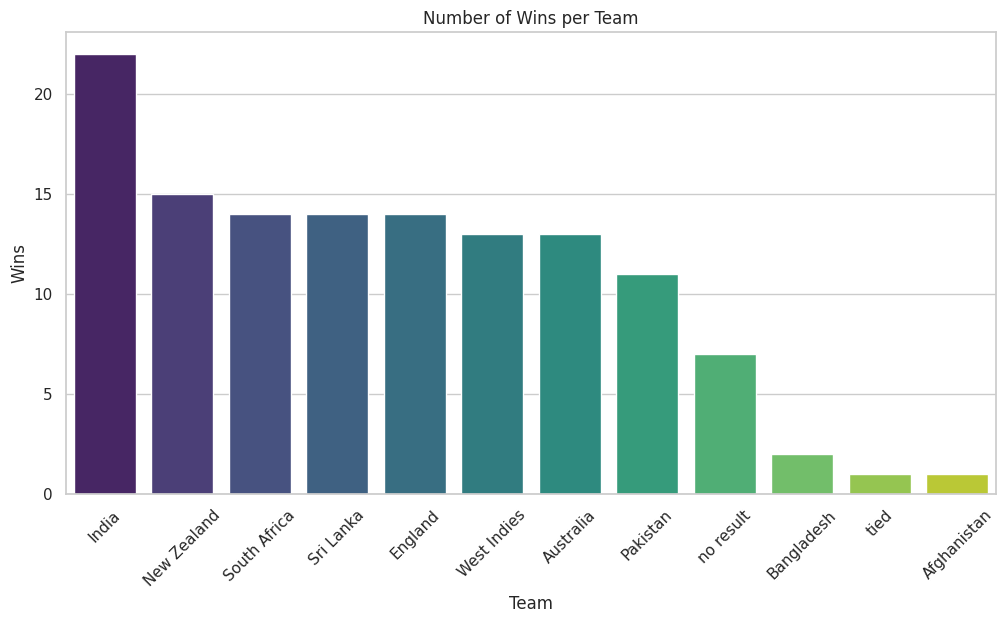

In [11]:
# 5. Win Distribution per team.

if 'Winner' in matches_df.columns:
    wins_count = matches_df['Winner'].value_counts()
    print("\nWins per Team:")
    print(wins_count)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=wins_count.index, y=wins_count.values, palette="viridis")
    plt.title("Number of Wins per Team")
    plt.xlabel("Team")
    plt.ylabel("Wins")
    plt.xticks(rotation=45)
    plt.show()

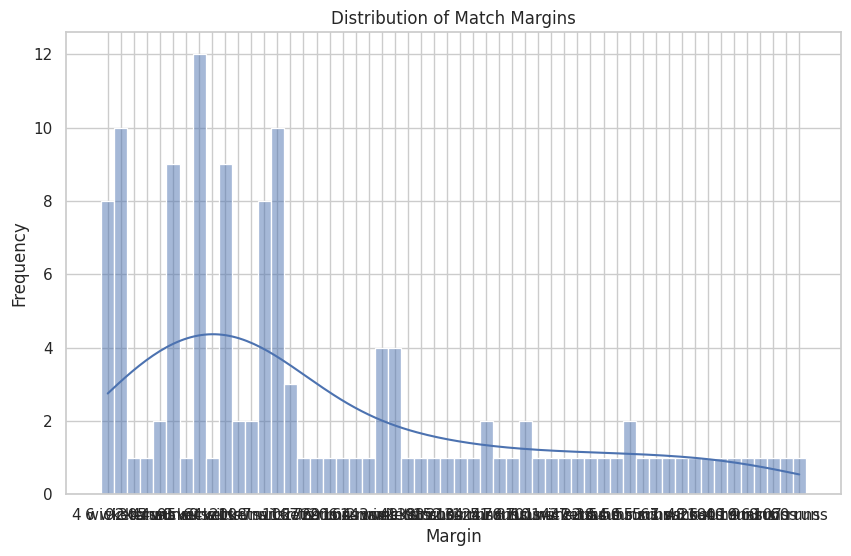

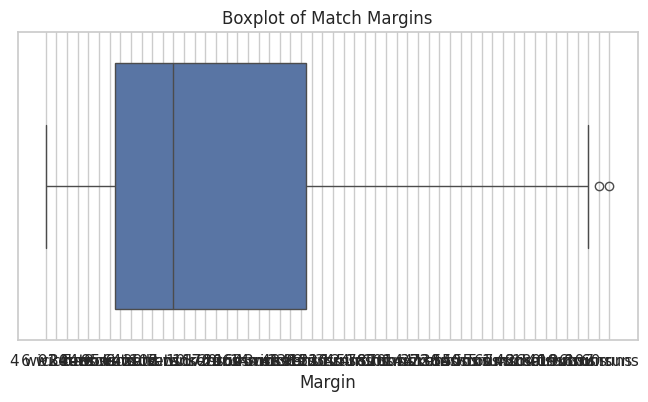

In [14]:
# 6. Match Margin Distribution.

if 'Margin' in matches_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(matches_df['Margin'].dropna(), bins=20, kde=True)
    plt.title("Distribution of Match Margins")
    plt.xlabel("Margin")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot for outlier detection
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=matches_df['Margin'])
    plt.title("Boxplot of Match Margins")
    plt.show()

In [18]:
# 7. Venue Analysis

if 'Venue' in matches_df.columns:
    venue_counts = matches_df['Venue'].value_counts()
    print("\nTop Venues:")
    print(venue_counts.head(10))

    plt.figure(figsize=(12, 6))
    sns.barplot(x=venue_counts.index, y=venue_counts.values, palette="coolwarm")
    plt.title("Matches Distribution by Venue")
    plt.xlabel("Venue")
    plt.ylabel("Number of Matches")
    plt.xticks(rotation=45)
    plt.show()

In [21]:
# 8. Temporal Trends of matches

if 'Date' in matches_df.columns:
    matches_df['Year'] = matches_df['Date'].dt.year
    matches_by_year = matches_df['Year'].value_counts().sort_index()
    print("Matches per Year:")
    print(matches_by_year)

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=matches_by_year.index, y=matches_by_year.values, marker='o')
    plt.title("Number of Matches per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Matches")
    plt.show()

Players per Team:
Team
South Africa    126
India           125
New Zealand     122
Australia       121
England         121
Pakistan        120
Sri Lanka       105
West Indies      95
Bangladesh       83
Zimbabwe         59
Kenya            37
Afghanistan      15
Netherlands      13
U.S.A.           13
Name: count, dtype: int64


<ipython-input-22-dddc08692945>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=players_count.index, y=players_count.values, palette="magma")


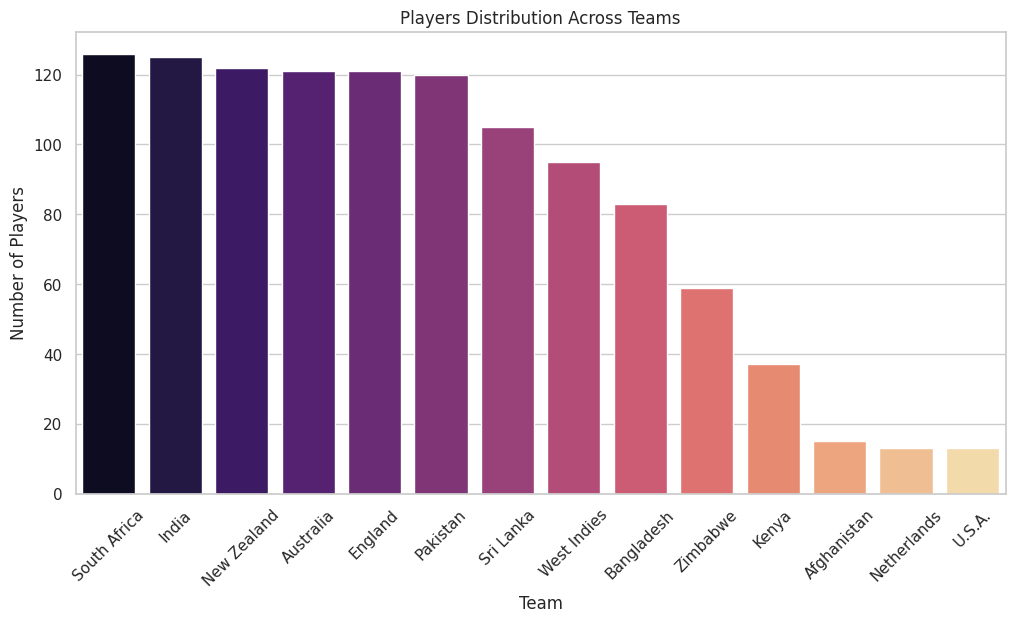

In [22]:
# 9. Players distrubution across the teams.

if 'Team' in players_df.columns:
    players_count = players_df['Team'].value_counts()
    print("Players per Team:")
    print(players_count)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=players_count.index, y=players_count.values, palette="magma")
    plt.title("Players Distribution Across Teams")
    plt.xlabel("Team")
    plt.ylabel("Number of Players")
    plt.xticks(rotation=45)
    plt.show()

In [23]:
# Player Role Distruibution.

if 'Role' in players_df.columns:
    role_counts = players_df['Role'].value_counts()
    print("Player Role Distribution:")
    print(role_counts)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=role_counts.index, y=role_counts.values, palette="Set2")
    plt.title("Distribution of Player Roles")
    plt.xlabel("Role")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

Team Wins vs. Player Count:
           Team  Wins  Player_Count
0         India    22           125
1   New Zealand    15           122
2  South Africa    14           126
3     Sri Lanka    14           105
4       England    14           121
5   West Indies    13            95
6     Australia    13           121
7      Pakistan    11           120
8    Bangladesh     2            83
9   Afghanistan     1            15


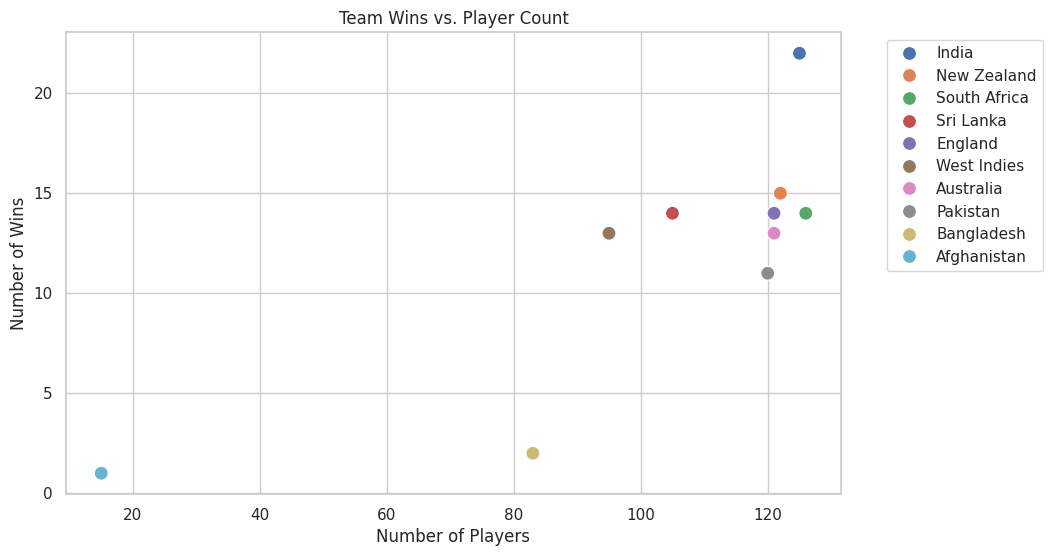

In [24]:
# 10. Relationship between Team Composition and Performance.

if 'Winner' in matches_df.columns and 'Team' in players_df.columns:
    wins_df = matches_df['Winner'].value_counts().reset_index()
    wins_df.columns = ['Team', 'Wins']

    players_count_df = players_df['Team'].value_counts().reset_index()
    players_count_df.columns = ['Team', 'Player_Count']

    merged_df = pd.merge(wins_df, players_count_df, on='Team', how='inner')
    print("Team Wins vs. Player Count:")
    print(merged_df)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_df, x='Player_Count', y='Wins', hue='Team', s=100)
    plt.title("Team Wins vs. Player Count")
    plt.xlabel("Number of Players")
    plt.ylabel("Number of Wins")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

Correlation Matrix:
                              Team1 Avg Batting Ranking  \
Team1 Avg Batting Ranking                      1.000000   
Team2 Avg Batting Ranking                     -0.005312   
Team1 Avg Bowling Ranking                      0.787276   
Team2 Avg Bowling Ranking                      0.033502   
Team1 Total CTs participated                  -0.014533   
Team1 Total CTs won                           -0.035568   
Team2 Total CTs participated                   0.196747   
Team2 Total CTs won                            0.169768   
Team1 W/L ratio over Team2                    -0.163354   

                              Team2 Avg Batting Ranking  \
Team1 Avg Batting Ranking                     -0.005312   
Team2 Avg Batting Ranking                      1.000000   
Team1 Avg Bowling Ranking                     -0.049887   
Team2 Avg Bowling Ranking                      0.759665   
Team1 Total CTs participated                   0.290178   
Team1 Total CTs won                

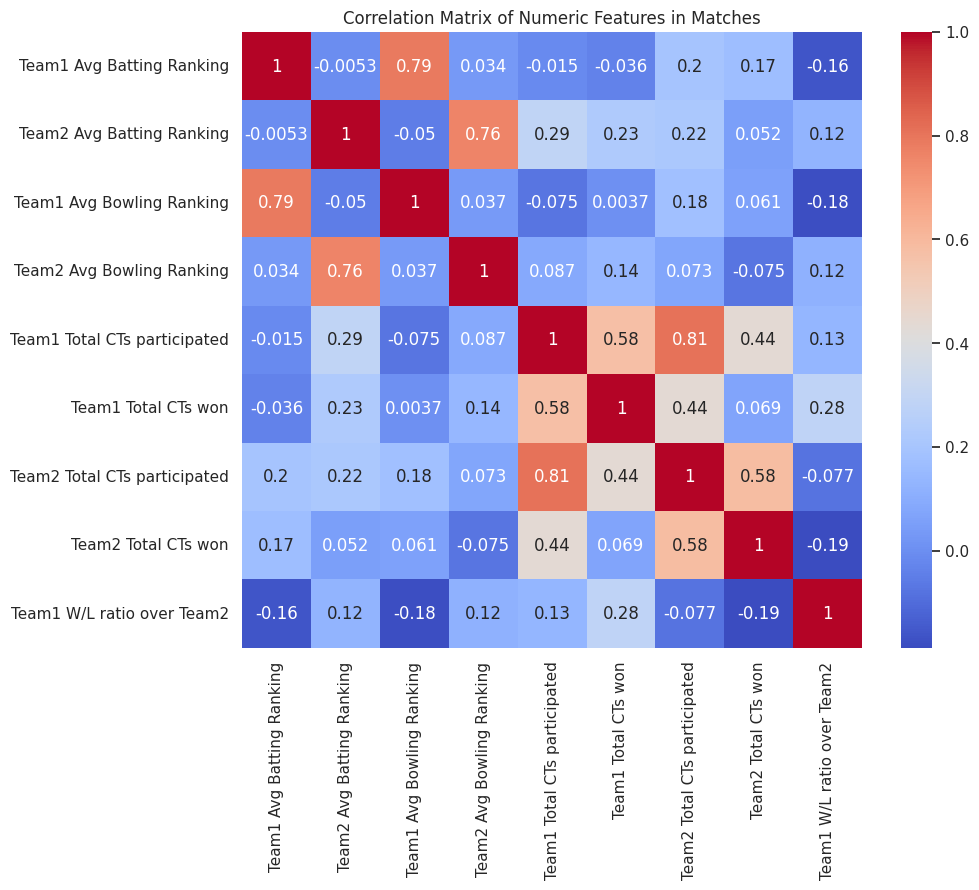

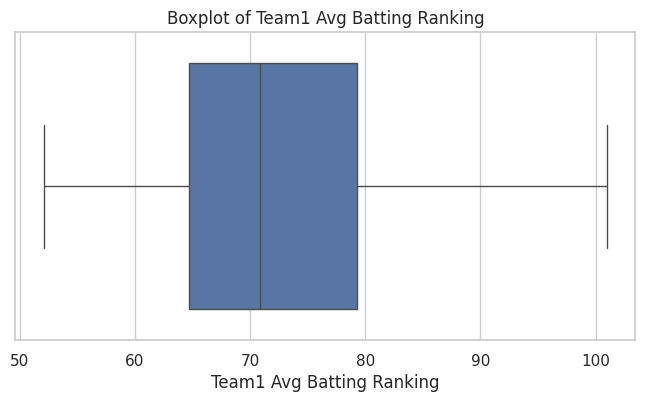

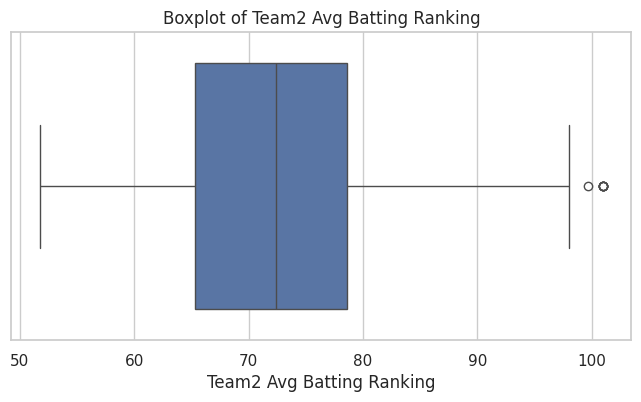

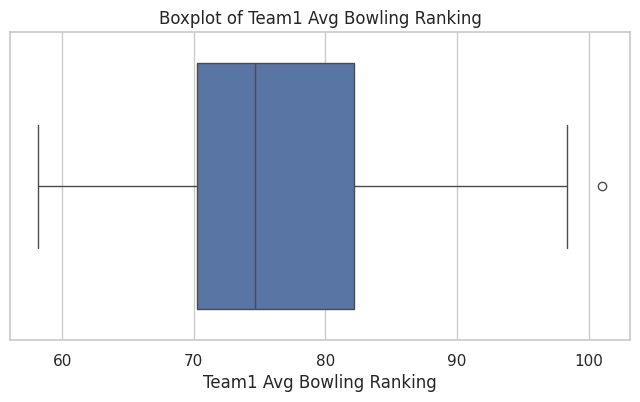

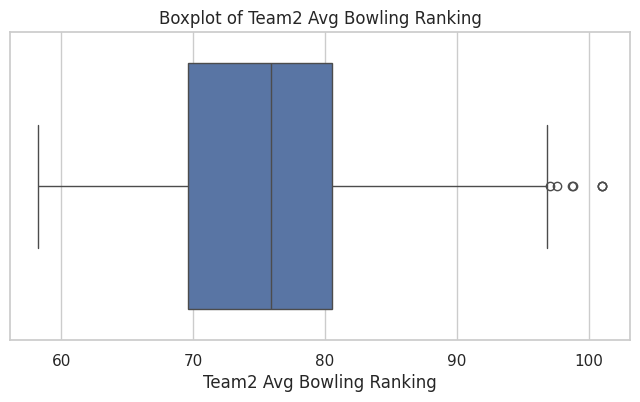

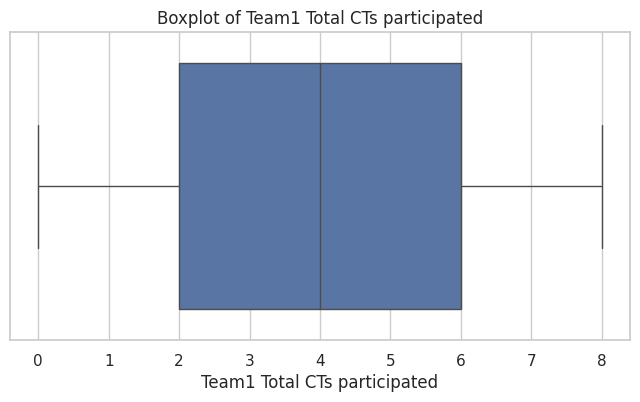

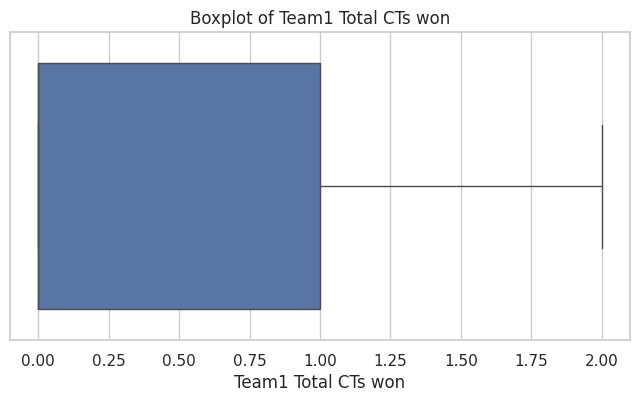

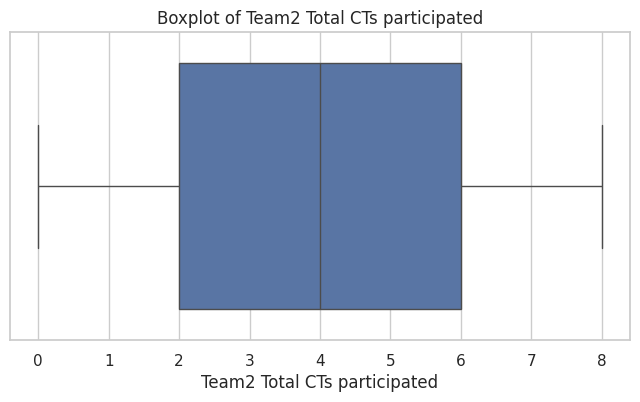

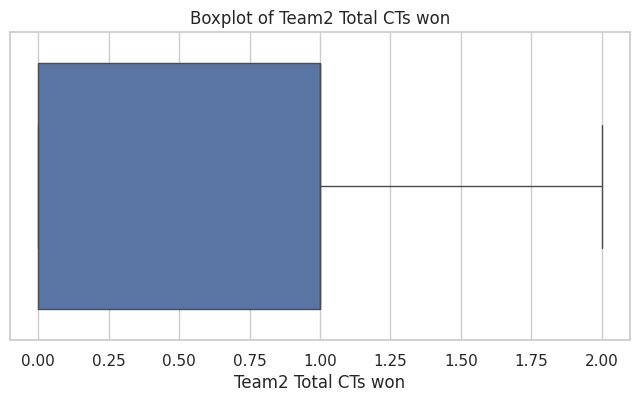

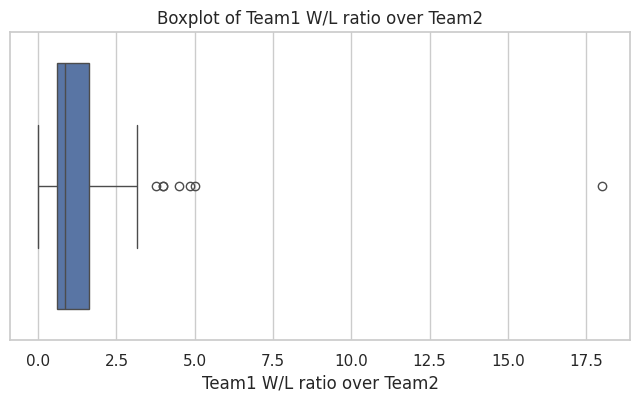

In [25]:
# 11. Numeric Correlation and Outlier Analysis.

import numpy as np

# Correlation matrix for numeric columns in matches dataset
numeric_cols = matches_df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features in Matches")
plt.show()

# Boxplot for each numeric column to identify outliers
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=matches_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Above, we use a correlation matrix to see how variables relate; box plots can help identify outliers in each numeric column.

<ipython-input-34-d3ded35e63bb>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_cluster['Wins'].fillna(merged_cluster['Wins'].mean(), inplace=True)
<ipython-input-34-d3ded35e63bb>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Clustering Results:
            Team  Wins     Margin  Cluster
0          India    22  25.636364        1
1    New Zealand    15  50.333333        0
2   South Africa    14  55.785714        0
3      Sri Lanka    14  44.571429        0
4        England    14  39.571429        0
5    West Indies    13  19.769231        1
6      Australia    13  24.230769        1
7       Pakistan    11  27.363636        1
8      no result     7  34.826190        0
9     Bangladesh     2  53.000000        0
10          tied     1  34.826190        0
11   Afghanistan     1   8.000000        1


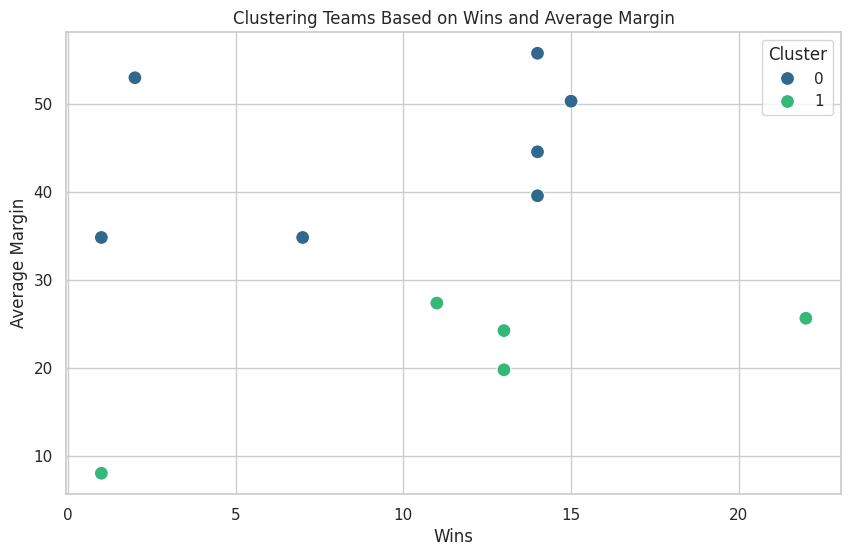

In [34]:
# 12. Clustering teams based on the performance. (Here we apply - K means clustering to group teams into clusters of high and low pweformance )

if 'Margin' in matches_df.columns and 'Winner' in matches_df.columns:
    # Calculate average margin per team
    avg_margin = matches_df.groupby('Winner')['Margin'].mean().reset_index()
    wins_df = matches_df['Winner'].value_counts().reset_index()
    wins_df.columns = ['Team', 'Wins']
    merged_cluster = pd.merge(wins_df, avg_margin, left_on='Team', right_on='Winner', how='inner')
    merged_cluster.drop('Winner', axis=1, inplace=True)

   # Before clustering, handle NaN values in 'Wins' and 'Margin' columns
    # For example, you can fill NaN values with the mean:
    merged_cluster['Wins'].fillna(merged_cluster['Wins'].mean(), inplace=True)
    merged_cluster['Margin'].fillna(merged_cluster['Margin'].mean(), inplace=True)
    #merged_cluster.dropna(subset=['Wins', 'Margin'], inplace=True)


    from sklearn.cluster import KMeans
    X = merged_cluster[['Wins', 'Margin']]
    kmeans = KMeans(n_clusters=2, random_state=42)
    merged_cluster['Cluster'] = kmeans.fit_predict(X)

    print("Clustering Results:")
    print(merged_cluster)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Wins', y='Margin', data=merged_cluster, hue='Cluster', palette='viridis', s=100)
    plt.title("Clustering Teams Based on Wins and Average Margin")
    plt.xlabel("Wins")
    plt.ylabel("Average Margin")
    plt.show()


In [35]:
import pandas as pd

matches_file_path = '/content/all_champions_trophy_matches_results.csv'

# Load the dataset
matches_df = pd.read_csv(matches_file_path)

# Convert the 'Date' column to datetime format
matches_df['Date'] = pd.to_datetime(matches_df['Date'], errors='coerce')

# Filter the data for matches between 1998 and 2025
filtered_matches = matches_df[(matches_df['Date'].dt.year >= 1998) & (matches_df['Date'].dt.year <= 2025)]

# Option 1: List unique winners
unique_winners = filtered_matches['Winner'].unique()
print("Unique Winners between 1998 and 2025:")
for winner in unique_winners:
    print(winner)

# Option 2: Get win counts for each team (if you want additional info)
winners_counts = filtered_matches['Winner'].value_counts()
print("\nWin counts for each team between 1998 and 2025:")
print(winners_counts)


KeyError: 'Date'

In [42]:
import pandas as pd

matches_file_path = '/content/all_champions_trophy_matches_results.csv'

# Load the dataset
matches_df = pd.read_csv(matches_file_path)

# Check if the 'Date' column exists, if not, create one (e.g., from 'Match Date' column)
if 'Date' not in matches_df.columns:
    if 'Match Date' in matches_df.columns:  # Assuming 'Match Date' column exists
        matches_df['Date'] = matches_df['Match Date']
    else:
        raise KeyError("Neither 'Date' nor 'Match Date' column found in the DataFrame.")

# Now convert the 'Date' column to datetime format
matches_df['Date'] = pd.to_datetime(matches_df['Date'], errors='coerce')

# Filter the data for matches between 1998 and 2025
filtered_matches = matches_df[(matches_df['Date'].dt.year >= 1998) & (matches_df['Date'].dt.year <= 2025)]

# Option 1: List unique winners
unique_winners = filtered_matches['Winner'].unique()
print("Unique Winners between 1998 and 2025:")
for winner in unique_winners:
    print(winner)

# Option 2: Get win counts for each team (if you want additional info)
winners_counts = filtered_matches['Winner'].value_counts()
print("\nWin counts for each team between 1998 and 2025:")
print(winners_counts)

Unique Winners between 1998 and 2025:
South Africa
West Indies
India
Sri Lanka
New Zealand
Pakistan
England
no result
Australia
Bangladesh
tied
Afghanistan

Win counts for each team between 1998 and 2025:
Winner
India           22
New Zealand     15
South Africa    14
Sri Lanka       14
England         14
West Indies     13
Australia       13
Pakistan        11
no result        7
Bangladesh       2
tied             1
Afghanistan      1
Name: count, dtype: int64


In [46]:
import pandas as pd

# Check if the 'Date' column exists, if not, create one (e.g., from 'Match Date' column)
if 'Date' not in matches_df.columns:
    if 'Match Date' in matches_df.columns:  # Assuming 'Match Date' column exists
        matches_df['Date'] = matches_df['Match Date']
    else:
        raise KeyError("Neither 'Date' nor 'Match Date' column found in the DataFrame.")

# Convert 'Date' column to datetime and filter by year

matches_df['Date'] = pd.to_datetime(matches_df['Date'], errors='coerce')
filtered_matches = matches_df[(matches_df['Date'].dt.year >= 1998) & (matches_df['Date'].dt.year <= 2025)]


# Extract unique "Player of the Match" entries

# Adjust the column name if needed (e.g., "Player of the Match" instead of "Player_of_Match")
if 'Player_of_Match' in filtered_matches.columns:
    unique_players = filtered_matches['Player_of_Match'].unique()
elif 'Player of the Match' in filtered_matches.columns:
    unique_players = filtered_matches['Player of the Match'].unique()
else:
    unique_players = []
    print("The expected column for 'Player of the Match' is not found in the dataset.")


# Print the list of unique players of the match

print("Players of the Match between 1998 and 2025:")
for player in unique_players:
    print(player)


Players of the Match between 1998 and 2025:
Jacques Kallis
Mervyn Dillon
Keith Arthurton
Sachin Tendulkar
Arjuna Ranatunga
Daryll Cullinan
Stephen Fleming
Chris Cairns
Sourav Ganguly
Shayne O'Connor
Roger Twose
Saeed Anwar
Yuvraj Singh
Alec Stewart
Avishka Gunawardene
Anil Kumble
nan
Aravinda de Silva
Virender Sehwag
Shane Bond
Shahid Afridi
Herschelle Gibbs
Jason Gillespie
Marcus Trescothick
Brian Lara
Marvan Atapattu
Glenn McGrath
Mohammad Kaif
Jonty Rhodes
Sanath Jayasuriya
Ian Bradshaw
Ramnaresh Sarwan
Michael Vaughan
Mohammad Yousuf
Andrew Flintoff
Andrew Symonds
Chris Gayle
Elton Chigumbura
Michael Kasprowicz
Charl Langeveldt
Paul Collingwood
Nathan Astle
Shane Watson

Damien Martyn
Makhaya Ntini
Shivnarine Chanderpaul
Shaun Pollock
Runako Morton
Abdul Razzaq
Munaf Patel
Farveez Maharoof
Shahriar Nafees
Upul Tharanga
Shane Watson
Daniel Vettori
Virat Kohli
Michael Hussey
Grant Elliott
Owais Shah
Shoaib Malik
Mitchell Johnson
Wayne Parnell
Umar Akmal
Tillakaratne Dilshan
Ravindra 

Win percentages by team (1998-2025):
Winner
India           17.322835
New Zealand     11.811024
South Africa    11.023622
Sri Lanka       11.023622
England         11.023622
West Indies     10.236220
Australia       10.236220
Pakistan         8.661417
no result        5.511811
Bangladesh       1.574803
tied             0.787402
Afghanistan      0.787402
Name: count, dtype: float64


<ipython-input-45-44f25bb70708>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winners_counts.values, y=winners_counts.index, palette="viridis")


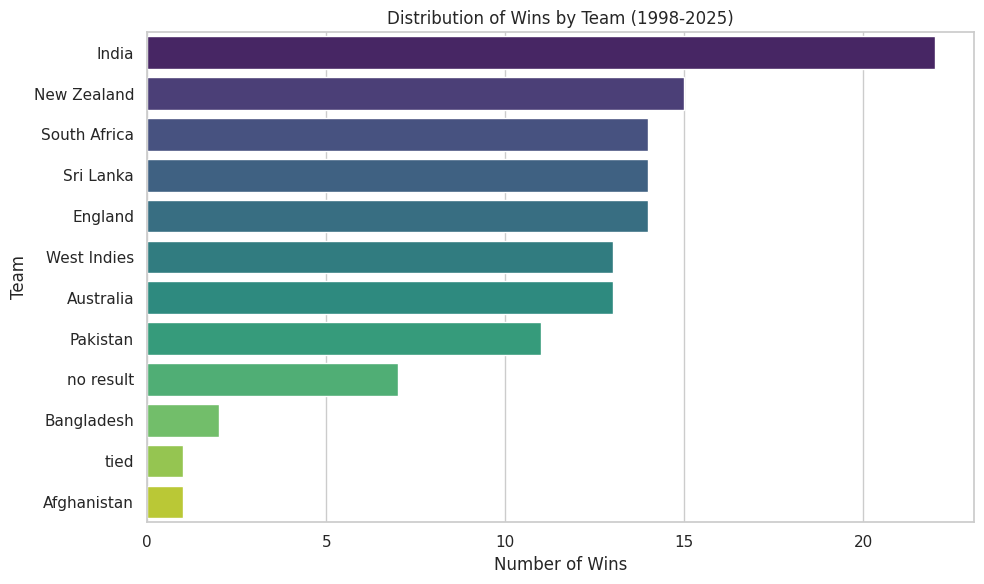

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# File Path and Data Loading

matches_file_path = '/content/all_champions_trophy_matches_results.csv'
matches_df = pd.read_csv(matches_file_path)

# Check if the 'Date' column exists, if not, create one (e.g., from 'Match Date' column)
if 'Date' not in matches_df.columns:
    if 'Match Date' in matches_df.columns:  # Assuming 'Match Date' column exists
        matches_df['Date'] = matches_df['Match Date']
    else:
        raise KeyError("Neither 'Date' nor 'Match Date' column found in the DataFrame.")


# Convert Date column to datetime and filter data

matches_df['Date'] = pd.to_datetime(matches_df['Date'], errors='coerce')
filtered_matches = matches_df[(matches_df['Date'].dt.year >= 1998) & (matches_df['Date'].dt.year <= 2025)]


# Calculate win counts and percentages

winners_counts = filtered_matches['Winner'].value_counts()
total_wins = winners_counts.sum()
winners_percentages = winners_counts / total_wins * 100

print("Win percentages by team (1998-2025):")
print(winners_percentages)

# Create a horizontal bar chart for win counts

plt.figure(figsize=(10, 6))
sns.barplot(x=winners_counts.values, y=winners_counts.index, palette="viridis")
plt.title("Distribution of Wins by Team (1998-2025)")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

# Thankyou!!

Hope You find my insights useful.
